Linear regression vs Logstic regression

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
x_data = np.arange(10).reshape(-1, 1)
y_data = (x_data >= 5).astype(np.int).reshape(-1, 1)

# outlier
x_data[9] = 100

In [3]:
x_data

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [100]])

In [4]:
y_data

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [5]:
xlim = (-1, 20)
ylim = (-0.5, 1.5)

def show_plot():
    plt.plot(x_data, y_data, 'o')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])
    plt.legend()
    plt.show()

C:\Users\Jaejun Yoo\Anaconda3\envs\tensorflow35\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


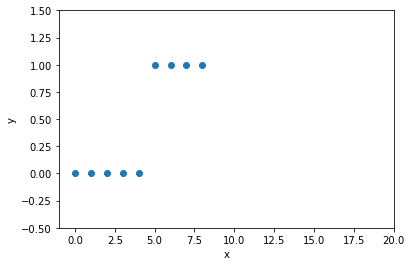

In [6]:
show_plot()

In [7]:
tf.reset_default_graph()

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 1])
Y = tf.placeholder(tf.float32, shape=[None, 1])

# W = tf.random_normal([1, 1])
# b = tf.random_normal([1])
W = tf.ones([1,1])
b = tf.zeros([1])

W_line = tf.Variable(W, name='weight_line')
b_line = tf.Variable(b, name='bias_line')
W_sigmoid = tf.Variable(W, name='weight_sigmoid')
b_sigmoid = tf.Variable(b, name='bias_sigmoid')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W) + b))
hypo_line = tf.matmul(X, W_line) + b_line
hypo_sigmoid = tf.sigmoid(tf.matmul(X, W_sigmoid) + b_sigmoid)

# cost/loss function
cost_line = tf.reduce_mean(tf.square(hypo_line - Y))
cost_sigmoid = -tf.reduce_mean(Y * tf.log(hypo_sigmoid + 1e-8) + (1 - Y) * tf.log(1 - hypo_sigmoid + 1e-8))
optimizer_line = tf.train.GradientDescentOptimizer(learning_rate=0.0001)
optimizer_sigmoid = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_line = optimizer_line.minimize(cost_line)
train_sigmoid = optimizer_sigmoid.minimize(cost_sigmoid)

# Accuracy computation
# True if hypothesis > 0.5 else False
prediction_line = tf.cast(hypo_line > 0.5, dtype=tf.float32)
prediction_sigmoid = tf.cast(hypo_sigmoid > 0.5, dtype=tf.float32)
accuracy_line = tf.reduce_mean(tf.cast(tf.equal(prediction_line, Y), dtype=tf.float32))
accuracy_sigmoid = tf.reduce_mean(tf.cast(tf.equal(prediction_sigmoid, Y), dtype=tf.float32))

In [8]:
x_data.shape, y_data.shape

((10, 1), (10, 1))

[0] (line) cost: 630.8366, acc: 60.00% | (sigmoid) cost: 1.1109, acc: 60.00%


C:\Users\Jaejun Yoo\Anaconda3\envs\tensorflow35\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


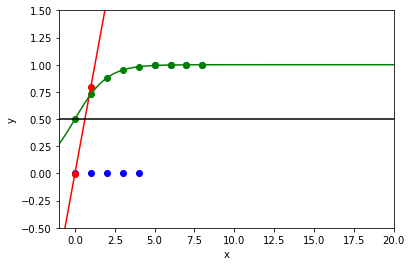

[1000] (line) cost: 0.3132, acc: 60.00% | (sigmoid) cost: 0.3334, acc: 90.00%


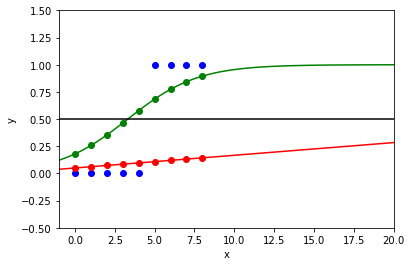

[2000] (line) cost: 0.2843, acc: 60.00% | (sigmoid) cost: 0.2575, acc: 90.00%


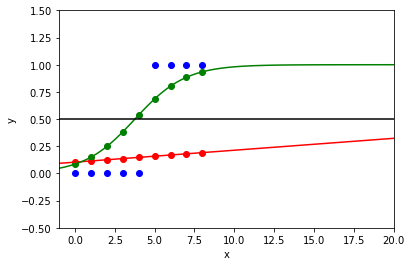

[3000] (line) cost: 0.2635, acc: 60.00% | (sigmoid) cost: 0.2172, acc: 90.00%


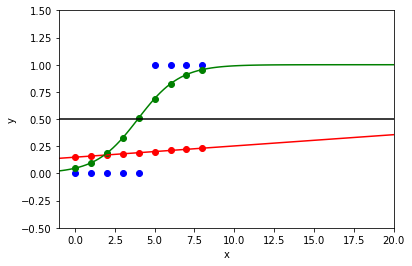

[4000] (line) cost: 0.2485, acc: 60.00% | (sigmoid) cost: 0.1918, acc: 100.00%


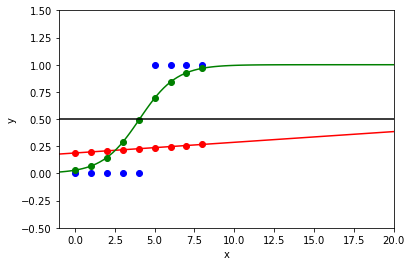

[5000] (line) cost: 0.2376, acc: 60.00% | (sigmoid) cost: 0.1741, acc: 100.00%


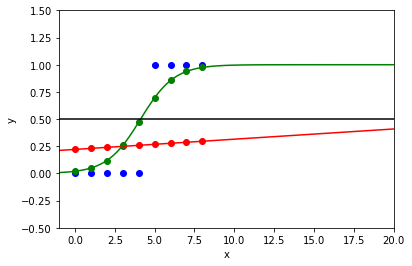

[6000] (line) cost: 0.2921, acc: 50.00% | (sigmoid) cost: 0.7386, acc: 50.00%


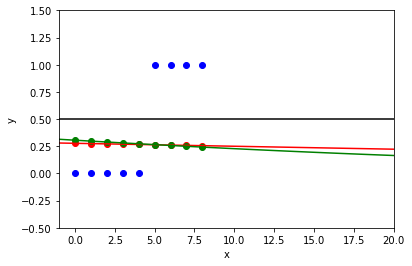

[7000] (line) cost: 0.2691, acc: 50.00% | (sigmoid) cost: 0.4005, acc: 80.00%


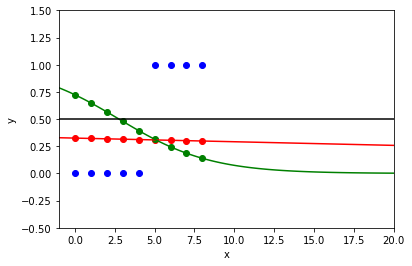

[8000] (line) cost: 0.2525, acc: 50.00% | (sigmoid) cost: 0.2871, acc: 90.00%


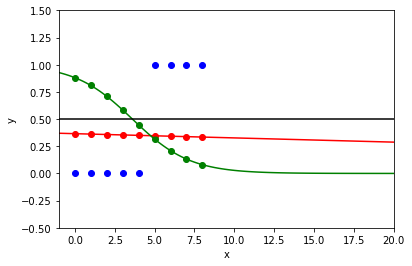

[9000] (line) cost: 0.2406, acc: 50.00% | (sigmoid) cost: 0.2340, acc: 90.00%


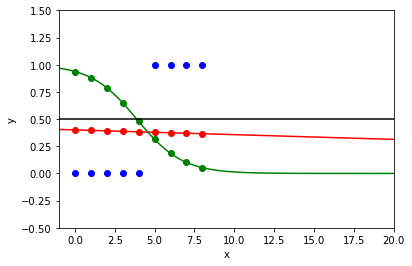

[10000] (line) cost: 0.2320, acc: 50.00% | (sigmoid) cost: 0.2028, acc: 100.00%


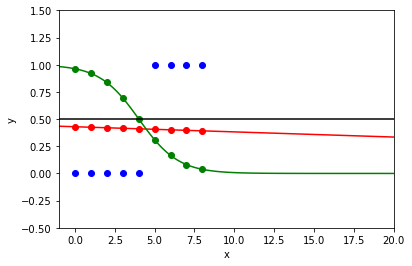

In [15]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

hx_l = np.linspace(xlim[0], xlim[1], 100)
hx_s = np.linspace(xlim[0], xlim[1], 100)

for step in range(10001):
    """
    cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
    if step % interval == 0:
        print(step, cost_val)
    """
    if step <= 5000:
        xt, yt, _1, _2, _3, _4 = sess.run([X, Y, cost_line, train_line, cost_sigmoid, train_sigmoid],
                                          {X: x_data, Y: y_data})

        # Accuracy report
        W_l, b_l, h_l, c_l, a_l = sess.run([W_line, b_line, hypo_line, cost_line, accuracy_line], 
                                           {X: x_data, Y: y_data})
        W_s, b_s, h_s, c_s, a_s = sess.run([W_sigmoid, b_sigmoid, hypo_sigmoid, cost_sigmoid, accuracy_sigmoid], 
                                           {X: x_data, Y: y_data})
    else:
        xt, yt, _1, _2, _3, _4 = sess.run([X, Y, cost_line, train_line, cost_sigmoid, train_sigmoid],
                                      {X: x_data, Y: 1-y_data})

        # Accuracy report
        W_l, b_l, h_l, c_l, a_l = sess.run([W_line, b_line, hypo_line, cost_line, accuracy_line], 
                                           {X: x_data, Y: 1-y_data})
        W_s, b_s, h_s, c_s, a_s = sess.run([W_sigmoid, b_sigmoid, hypo_sigmoid, cost_sigmoid, accuracy_sigmoid], 
                                           {X: x_data, Y: 1-y_data})
    
    if step % 1000 == 0:
        print("[{}] (line) cost: {:.4f}, acc: {:.2%} | (sigmoid) cost: {:.4f}, acc: {:.2%}".format(step, c_l, a_l, c_s, a_s))
        plt.plot(x_data, y_data, 'bo')
        plt.plot(x_data, h_l, 'ro')
        plt.plot(x_data, h_s, 'go')

        # learning linear function
        hy_l = W_l * hx_l + b_l
        plt.plot(hx_l, hy_l[0], 'r')
        # learning sigmoid function
        hy_s = 1 / (1 + np.exp(-(W_s * hx_s + b_s)))
        plt.plot(hx_s, hy_s[0], 'g')
        # y = 0.5
        plt.plot(hx_s, np.full(hx_s.shape[0], 0.5), 'black')

        # 
        plt.xlabel('x')
        plt.ylabel('y')
        plt.xlim(xlim[0], xlim[1])
        plt.ylim(ylim[0], ylim[1])
        plt.legend()
        plt.show()

        if a_l == 1.0 and a_s == 1.0:
            pass #break
        elif math.isnan(c_l) and math.isnan(c_s):
            break

In [13]:
print(y_data)

SyntaxError: invalid syntax (<ipython-input-13-3035a98544e1>, line 1)